In [1]:
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import numpy as np
from matplotlib.colors import ListedColormap
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
def KNN(X,y,u,k):
    """Classifies by K nearest training object

    Keyword arguments:
    X -- training sample
    y -- classes of training samples
    u -- object to classify
    k -- number of near object to classify
    """
    L = [(x[0]-u[0])**2 + (x[1]-u[1])**2 for x in X]
    L,y = zip(*sorted(zip(L, y)))
    l = []
    for i in range(0,k):
        l.append(y[i])
    u, c = np.unique(l, return_counts=True)
    return u[np.argmax(c)]


def LOOforKNN(X,y):
    diff = len(X)
    gk = 0
    kvarray = []
    u = [[],0]
    for k in range(1,len(X)):
        cd = 0
        for i in range(1,len(X)):
            u[0] = X[i]
            u[1] = y[i]
            Xt = np.delete(X,i,0)
            yt = np.delete(y,i)
            if(KNN(Xt,yt,u[0],k)!=u[1]):
                cd = cd+1
        if(diff>cd):
            diff = cd
            gk = k
        kvarray.append(cd)
    return gk,kvarray

In [4]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

31


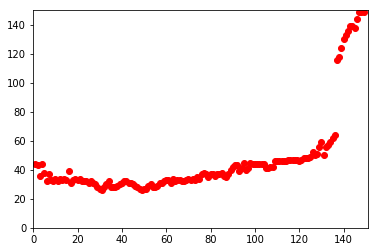

In [5]:
gk,ga = LOOforKNN(X,y)
print(gk)

plt.plot([x for x in range(1,len(X))], ga, 'ro')
plt.axis([0, len(X)+1, 0, ga[np.argmax(ga)]+1])
plt.show()

In [6]:
h = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = np.array([KNN(X,y,u,31) for u in  np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

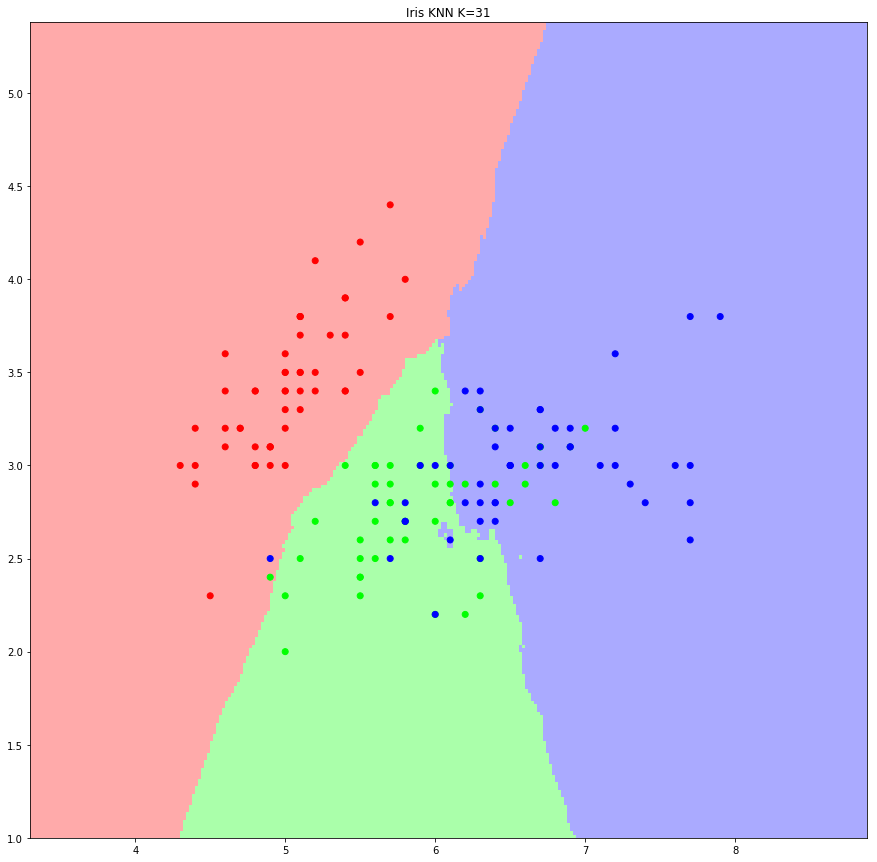

In [7]:
plt.figure(figsize=(15,15))
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:,0],X[:,1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris KNN K=31")
plt.show()